In [1]:
import os
import time
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


In [2]:

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/button-tone-sz/columnLabels.csv
/kaggle/input/button-tone-sz/ERPdata.csv
/kaggle/input/button-tone-sz/demographic.csv
/kaggle/input/button-tone-sz/time.csv
/kaggle/input/button-tone-sz/mergedTrialData.csv
/kaggle/input/button-tone-sz/18.csv/18.csv
/kaggle/input/button-tone-sz/20.csv/20.csv
/kaggle/input/button-tone-sz/71.csv/71.csv
/kaggle/input/button-tone-sz/74.csv/74.csv
/kaggle/input/button-tone-sz/1.csv/1.csv
/kaggle/input/button-tone-sz/24.csv/24.csv
/kaggle/input/button-tone-sz/78.csv/78.csv
/kaggle/input/button-tone-sz/75.csv/75.csv
/kaggle/input/button-tone-sz/11.csv/11.csv
/kaggle/input/button-tone-sz/17.csv/17.csv
/kaggle/input/button-tone-sz/77.csv/77.csv
/kaggle/input/button-tone-sz/16.csv/16.csv
/kaggle/input/button-tone-sz/68.csv/68.csv
/kaggle/input/button-tone-sz/3.csv/3.csv
/kaggle/input/button-tone-sz/19.csv/19.csv
/kaggle/input/button-tone-sz/73.csv/73.csv
/kaggle/input/button-tone-sz/5.csv/5.csv
/kaggle/input/button-tone-sz/2.csv/2.csv
/kaggle/input/b

In [3]:
demographic = pd.read_csv("/kaggle/input/button-tone-sz/demographic.csv")
demographic

,subject,group,gender,age,education
0,1,0,M,44,16.0
1,2,0,M,39,17.0
2,3,0,M,53,18.0
3,4,0,M,52,15.0
4,5,0,M,41,16.0
...,...,...,...,...,...
76,77,1,M,28,13.0
77,78,1,F,32,16.0
78,79,1,M,37,16.0
79,80,1,M,33,13.0


In [4]:
demographic[" group"].mean()

0.6049382716049383

In [5]:
demographic[" group"].value_counts()

 group
1    49
0    32
Name: count, dtype: int64

In [6]:
for i, t in enumerate(list(demographic[" group"])):
    if t:
        print(f"{i} - Schizophrenia")
    else:
        print(f"{i} - HEALTHY")
        

0 - HEALTHY
1 - HEALTHY
2 - HEALTHY
3 - HEALTHY
4 - HEALTHY
5 - HEALTHY
6 - HEALTHY
7 - HEALTHY
8 - HEALTHY
9 - HEALTHY
10 - HEALTHY
11 - HEALTHY
12 - HEALTHY
13 - HEALTHY
14 - HEALTHY
15 - HEALTHY
16 - HEALTHY
17 - HEALTHY
18 - HEALTHY
19 - HEALTHY
20 - HEALTHY
21 - HEALTHY
22 - HEALTHY
23 - HEALTHY
24 - Schizophrenia
25 - Schizophrenia
26 - Schizophrenia
27 - Schizophrenia
28 - Schizophrenia
29 - Schizophrenia
30 - Schizophrenia
31 - Schizophrenia
32 - Schizophrenia
33 - Schizophrenia
34 - Schizophrenia
35 - Schizophrenia
36 - Schizophrenia
37 - Schizophrenia
38 - Schizophrenia
39 - Schizophrenia
40 - Schizophrenia
41 - Schizophrenia
42 - Schizophrenia
43 - Schizophrenia
44 - Schizophrenia
45 - Schizophrenia
46 - Schizophrenia
47 - Schizophrenia
48 - Schizophrenia
49 - Schizophrenia
50 - Schizophrenia
51 - Schizophrenia
52 - Schizophrenia
53 - Schizophrenia
54 - Schizophrenia
55 - Schizophrenia
56 - Schizophrenia
57 - Schizophrenia
58 - HEALTHY
59 - HEALTHY
60 - HEALTHY
61 - HEALTHY


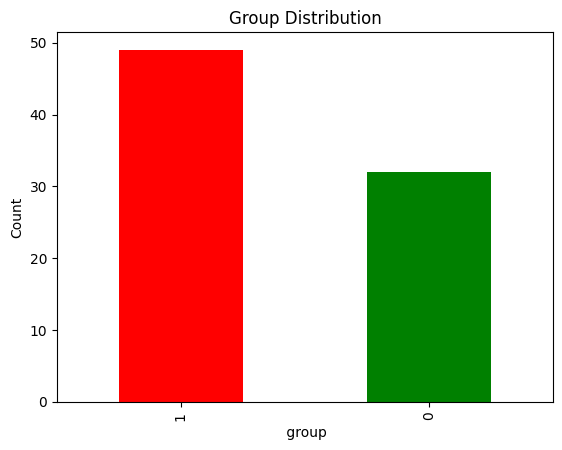

In [7]:
demographic[" group"].value_counts().plot(kind="bar", color=["red", "green"])
plt.title("Group Distribution")
plt.ylabel("Count")
plt.show()


In [8]:
diagnosis_dict = dict(zip(demographic.subject, demographic[" group"]))
del demographic

In [9]:
electrodes_list = list(pd.read_csv("/kaggle/input/button-tone-sz/columnLabels.csv").columns[4:])
print("Electrodes List \n",electrodes_list)

Electrodes List 
 ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'VEOa', 'VEOb', 'HEOL', 'HEOR', 'Nose', 'TP10']


In [10]:
import os 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.signal import butter, lfilter
from tqdm import tqdm  

# Define the path to the dataset
dataset_path1 = '/kaggle/input/button-tone-sz'
dataset_path2 = '/kaggle/input/buttontonesz2'

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    #Apply a bandpass filter to the data
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, data, axis=0)

def segment_data(eeg_data, window_size, overlap):
    #Segment EEG data into overlapping windows
    step = int(window_size * (1 - overlap))
    windows = []
    for start in range(0, len(eeg_data) - window_size + 1, step):
        windows.append(eeg_data[start:start + window_size])
    return np.array(windows)

def extract_features(eeg_data):
    #Extract features from EEG data: mean and std.
    mean_features = np.mean(eeg_data, axis=0)
    std_features = np.std(eeg_data, axis=0)
    return np.concatenate([mean_features, std_features])

def load_preprocessed_data(folder_paths, diagnosis_dict, fs, lowcut, highcut, window_size, overlap):
    #Load and preprocess .csv files in the specified folders
    data = []
    labels = []
    for folder_path in folder_paths:
        for root, _, files in os.walk(folder_path):
            # Wrap the file processing loop with tqdm to show progress
            for file in tqdm(files, desc=f"Processing {folder_path}", unit='file'):
                if file.endswith('.csv'):
                    subject_id = os.path.splitext(file)[0]
                    if subject_id in diagnosis_dict:
                        label = diagnosis_dict[subject_id]
                        file_path = os.path.join(root, file)
                        eeg_data = pd.read_csv(file_path).values

                        # Apply bandpass filter
                        eeg_data = bandpass_filter(eeg_data, lowcut, highcut, fs)

                        # Segment data into windows
                        windows = segment_data(eeg_data, window_size, overlap)

                        # Extract features for each window
                        features = [extract_features(window) for window in windows]
                        data.extend(features)
                        labels.extend([label] * len(features))
    return np.array(data), np.array(labels)

# Parameters for preprocessing
sampling_frequency = 1024
lowcut = 1.0
highcut = 40.0
window_size = int(2 * sampling_frequency)
overlap = 0.3

# Load demographic data for labels
demographic = pd.read_csv("/kaggle/input/button-tone-sz/demographic.csv")
diagnosis_dict = dict(zip(demographic['subject'].astype(str), demographic[" group"]))

# Load and preprocess data
data_paths = [dataset_path1, dataset_path2]
X, y = load_preprocessed_data(
    data_paths, diagnosis_dict, fs=sampling_frequency, lowcut=lowcut, highcut=highcut, window_size=window_size, overlap=overlap
)

# Normalize each sample
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Demographic data analysis
print(demographic.head())
print("Mean group value:", demographic[" group"].mean())
print("Group value counts:")
print(demographic[" group"].value_counts())

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)


Processing /kaggle/input/button-tone-sz: 100%|██████████| 1/1 [00:16<00:00, 16.14s/file]
Processing /kaggle/input/buttontonesz2: 0file [00:00, ?file/s]
Processing /kaggle/input/buttontonesz2: 100%|██████████| 1/1 [00:16<00:00, 16.11s/file]


   subject   group  gender   age   education
0        1       0       M    44        16.0
1        2       0       M    39        17.0
2        3       0       M    53        18.0
3        4       0       M    52        15.0
4        5       0       M    41        16.0
Mean group value: 0.6049382716049383
Group value counts:
 group
1    49
0    32
Name: count, dtype: int64


In [11]:
# Reshape for CNN input (samples, timepoints, channels, 1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (39730, 148, 1), Test shape: (9933, 148, 1)


**CHANNEL ATTENTION**

In [13]:
# Import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Layer, GlobalAveragePooling2D, GlobalMaxPooling2D, Multiply, Add, Reshape, Activation, Bidirectional, GRU, PReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import seaborn as sns
from keras.regularizers import l2

# Define Channel Attention Layer
class ChannelAttention(Layer):
    def __init__(self, filters, reduction_ratio=16, **kwargs):
        super(ChannelAttention, self).__init__(**kwargs)
        self.filters = filters
        self.reduction_ratio = reduction_ratio
        self.global_avg_pool = GlobalAveragePooling2D()
        self.global_max_pool = GlobalMaxPooling2D()
        self.dense1 = Dense(filters // reduction_ratio, activation='relu')
        self.dense2 = Dense(filters, activation='sigmoid')

    def call(self, inputs):
        avg_pool = self.global_avg_pool(inputs)
        avg_pool = self.dense1(avg_pool)
        avg_pool = self.dense2(avg_pool)

        max_pool = self.global_max_pool(inputs)
        max_pool = self.dense1(max_pool)
        max_pool = self.dense2(max_pool)

        combined = Add()([avg_pool, max_pool])
        combined = tf.expand_dims(combined, axis=1)
        combined = tf.expand_dims(combined, axis=2)

        return Multiply()([inputs, combined])

    def get_config(self):
        config = super(ChannelAttention, self).get_config()
        config.update({
            "filters": self.filters,
            "reduction_ratio": self.reduction_ratio
        })
        return config

# Define Model Framework
class ProposedModelFramework:
    def __init__(self, classes, input_shape):
        self.classes = classes
        self.input_shape = (input_shape[0], input_shape[1], 1)  # Add channel dimension
        self.model = Sequential()

        # CNN layers with PReLU activation
        self.model.add(Conv2D(32, (3, 1), input_shape=self.input_shape))
        self.model.add(PReLU())
        self.model.add(Conv2D(32, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))
        
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))

        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))

        # Flatten layer to prepare for BiGRU
        self.model.add(Flatten())
        # Reshape to fit Bigru input shape
        self.model.add(Reshape((-1, 128)))

        # Apply BiGRU layer before Channel Attention
        self.model.add(Bidirectional(GRU(128, return_sequences=True)))

        # Reshape before Channel Attention to add a channel dimension
        self.model.add(Reshape((-1, 1, 128)))
        # Apply Channel Attention
        self.model.add(ChannelAttention(filters=128))

        # Reshape after Channel Attention back to 3D
        self.model.add(Reshape((-1, 128)))

        # Flatten before Dense layers
        self.model.add(Flatten())

        # Dense layers with PReLU activation
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(256))
        self.model.add(PReLU())
        self.model.add(Dropout(0.5))

        # Final Classification Layer
        self.model.add(Dense(1, activation='sigmoid'))

    def train(self, X_train, y_train, epochs, batch_size, validation_split):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                 validation_split=validation_split, callbacks=[early_stopping, lr_scheduler])
        return history

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def display_summary(self):
        print("\nModel Summary:")
        self.model.summary()

# Example Usage (Ensure X_train is defined before running this)
input_shape = (X_train.shape[1], X_train.shape[2])  # Define shape
model = ProposedModelFramework(classes=1, input_shape=input_shape)
model.display_summary()



Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 146, 1, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_10 (PReLU)                   │ (None, 146, 1, 32)          │           4,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 144, 1, 32)          │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_11 (PReLU)                   │ (None, 144, 1, 32)          │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 72, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 72, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 70, 1, 64)           │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_12 (PReLU)                   │ (None, 70, 1, 64)           │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 68, 1, 64)           │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_13 (PReLU)                   │ (None, 68, 1, 64)           │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 34, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 34, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 1, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_14 (PReLU)                   │ (None, 32, 1, 128)          │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 30, 1, 128)          │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_15 (PReLU)                   │ (None, 30, 1, 128)          │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_3 (Reshape)                  │ (None, 15, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 15, 256)             │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_4 (Reshape)                  │ (None, 30, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 880,745 (3.36 MB)

 Trainable params: 880,745 (3.36 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 62s 13ms/step - accuracy: 0.7420 - loss: 0.4955 - val_accuracy: 0.9219 - val_loss: 0.1967 - learning_rate: 0.0010
Epoch 2/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 52s 13ms/step - accuracy: 0.9089 - loss: 0.2242 - val_accuracy: 0.9434 - val_loss: 0.1478 - learning_rate: 0.0010
Epoch 3/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 52s 13ms/step - accuracy: 0.9354 - loss: 0.1627 - val_accuracy: 0.9631 - val_loss: 0.0949 - learning_rate: 0.0010
Epoch 4/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 52s 13ms/step - accuracy: 0.9507 - loss: 0.1266 - val_accuracy: 0.9706 - val_loss: 0.0781 - learning_rate: 0.0010
Epoch 5/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 52s 13ms/step - accuracy: 0.9605 - loss: 0.1008 - val_accuracy: 0.9795 - val_loss: 0.0555 - learning_rate: 0.0010
Epoch 6/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 52s 13ms/step - accuracy: 0.9682 - loss: 0.0834 - val_accuracy: 0.9809 - val_loss: 0.0500 - learning_rate: 0.0010
Epoch 7/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 52s 13ms/step -

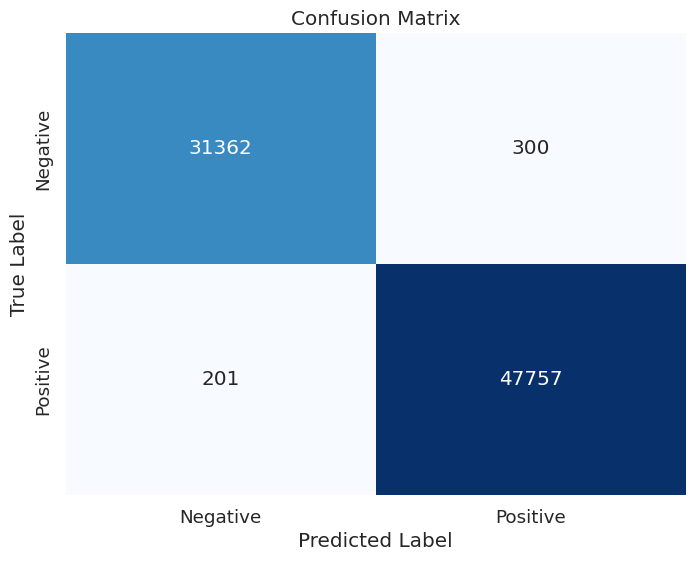

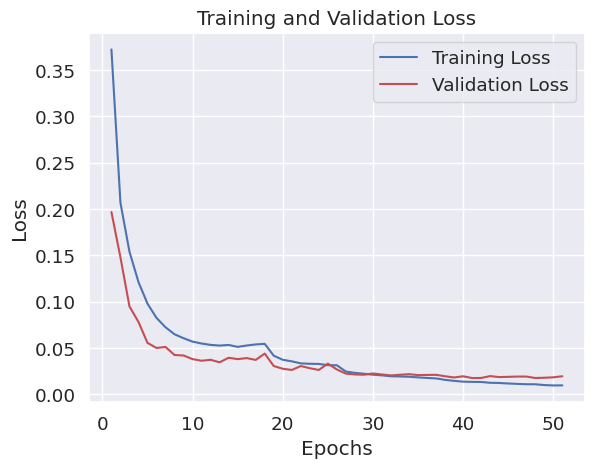

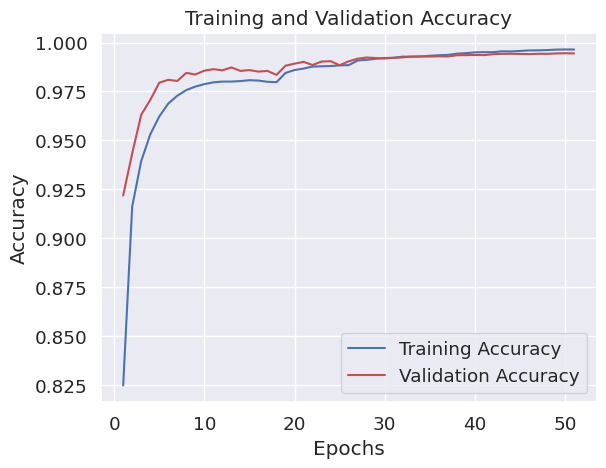

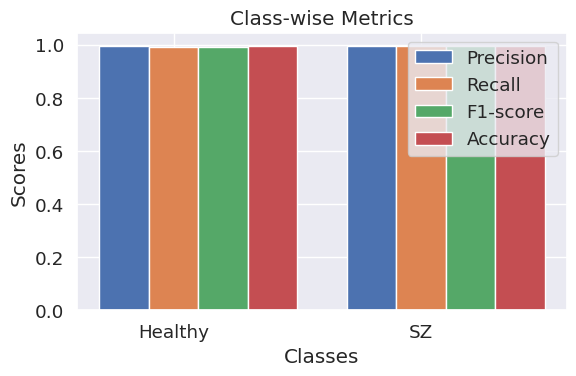

Training Accuracy: 99.64%
Validation Accuracy: 99.44%
2489/2489 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9935 - loss: 0.0191
Testing Accuracy: 99.37%
Precision: 99.38%
Recall: 99.58%
F1-Score: 99.48%


In [14]:
def plot_class_wise_metric(classes, y_test, y_pred_classes):
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None)
    accuracy = accuracy_score(y_test, y_pred_classes)
    class_labels = ['Healthy', 'SZ']

    # Define metrics to plot
    metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    classwise_metrics = [precision, recall, f1_score, [accuracy] * len(precision)]

    # Plot bar graph
    fig, ax = plt.subplots(figsize=(6, 4))

    index = np.arange(len(class_labels))
    bar_width = 0.2
    opacity = 0.8

    for i, metric in enumerate(metrics):
        ax.bar(index + i * bar_width, classwise_metrics[i], bar_width, label=metric)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Class-wise Metrics')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(class_labels)
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'{classes}_rimli_bar_graph.png')
    plt.show()

def plot_loss_curve(history, classes):
    # Access loss and accuracy from training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot loss vs epoch
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'{classes}_rimli_loss_curve.png')
    plt.show()

    # Plot accuracy vs epoch
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'{classes}_rimli_accuracy.png')
    plt.show()

def plot_confusion_matrix(y_test, y_pred_classes):
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set_theme(font_scale=1.2)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'], cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def metric_values(model, y_pred_classes, X_test, y_test):
    accuracy = model.evaluate(X_test, y_test)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
    print("Accuracy:", accuracy*100, "%")
    print("Precision:", precision*100, "%")
    print("Recall:", recall*100, "%")
    print("F1-score:", f1_score*100, "%")

# Model evaluation 
def evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs=100, batch_size=64):
    # Normalize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

    # Create and train the model
    model = ProposedModelFramework(2, input_shape)
    history = model.train(X_train, y_train, epochs, batch_size, validation_split=0.2)

    # Evaluate on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int).flatten()

    # Metrics and plots
    plot_confusion_matrix(y_test, y_pred_classes)
    plot_loss_curve(history, "Healthy vs Schizophrenic")
    plot_class_wise_metric("Healthy vs Schizophrenic", y_test, y_pred_classes)

    # Training and validation accuracy from history
    train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy
    val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy

    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

    # Evaluate model on test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='binary')
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1_score * 100:.2f}%")

# Perform model evaluation once
input_shape = (X_train.shape[1], X_train.shape[2])
epochs = 100
batch_size = 64
evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs, batch_size)


**SELF ATTENTION**

In [13]:
# Import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Layer, GlobalAveragePooling2D, GlobalMaxPooling2D, Multiply, Add, Reshape, Activation, Bidirectional, GRU, PReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import seaborn as sns
from keras.regularizers import l2

# Define Self-Attention Layer
class SelfAttention(Layer):
    def __init__(self, filters=128, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)
        self.filters = filters
        self.query_dense = Dense(filters)
        self.key_dense = Dense(filters)
        self.value_dense = Dense(filters)
        self.softmax = Activation('softmax')

    def call(self, inputs):
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_weights = self.softmax(attention_scores)
        attention_output = tf.matmul(attention_weights, value)
        return attention_output

    def get_config(self):
        config = super(SelfAttention, self).get_config()
        config.update({"filters": self.filters})
        return config

# Define Model Framework
class ProposedModelFramework:
    def __init__(self, classes, input_shape):
        self.classes = classes
        self.input_shape = (input_shape[0], input_shape[1], 1)  # Add channel dimension
        self.model = Sequential()

        # CNN layers with PReLU activation
        self.model.add(Conv2D(32, (3, 1), input_shape=self.input_shape))
        self.model.add(PReLU())
        self.model.add(Conv2D(32, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))
        
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))

        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))

        # Flatten layer to prepare for BiGRU
        self.model.add(Flatten())
        # Reshape to fit BiGRU input shape
        self.model.add(Reshape((-1, 128)))

        # Apply BiGRU layer before Self-Attention
        self.model.add(Bidirectional(GRU(128, return_sequences=True)))

        # Apply Self-Attention
        self.model.add(SelfAttention(filters=128))

        # Flatten before Dense layers
        self.model.add(Flatten())

        # Dense layers with PReLU activation
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(256))
        self.model.add(PReLU())
        self.model.add(Dropout(0.5))

        # Final Classification Layer
        self.model.add(Dense(1, activation='sigmoid'))

    def train(self, X_train, y_train, epochs, batch_size, validation_split):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                 validation_split=validation_split, callbacks=[early_stopping, lr_scheduler])
        return history

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def display_summary(self):
        print("\nModel Summary:")
        self.model.summary()

# Example Usage 
input_shape = (X_train.shape[1], X_train.shape[2])  # Define shape
model = ProposedModelFramework(classes=1, input_shape=input_shape)
model.display_summary()



Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 146, 1, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_10 (PReLU)                   │ (None, 146, 1, 32)          │           4,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 144, 1, 32)          │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_11 (PReLU)                   │ (None, 144, 1, 32)          │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 72, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 72, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 70, 1, 64)           │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_12 (PReLU)                   │ (None, 70, 1, 64)           │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 68, 1, 64)           │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_13 (PReLU)                   │ (None, 68, 1, 64)           │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 34, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 34, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 1, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_14 (PReLU)                   │ (None, 32, 1, 128)          │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 30, 1, 128)          │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_15 (PReLU)                   │ (None, 30, 1, 128)          │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 15, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 15, 256)             │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ self_attention_1 (SelfAttention)     │ (None, 15, 128)             │          98,688 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 731,489 (2.79 MB)

 Trainable params: 731,489 (2.79 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 76s 16ms/step - accuracy: 0.7235 - loss: 0.5202 - val_accuracy: 0.9010 - val_loss: 0.2510 - learning_rate: 0.0010
Epoch 2/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 63s 16ms/step - accuracy: 0.8992 - loss: 0.2504 - val_accuracy: 0.9407 - val_loss: 0.1539 - learning_rate: 0.0010
Epoch 3/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 63s 16ms/step - accuracy: 0.9211 - loss: 0.1956 - val_accuracy: 0.9512 - val_loss: 0.1237 - learning_rate: 0.0010
Epoch 4/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 63s 16ms/step - accuracy: 0.9325 - loss: 0.1706 - val_accuracy: 0.9580 - val_loss: 0.1126 - learning_rate: 0.0010
Epoch 5/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 63s 16ms/step - accuracy: 0.9397 - loss: 0.1543 - val_accuracy: 0.9617 - val_loss: 0.1013 - learning_rate: 0.0010
Epoch 6/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 64s 16ms/step - accuracy: 0.9457 - loss: 0.1407 - val_accuracy: 0.9647 - val_loss: 0.0905 - learning_rate: 0.0010
Epoch 7/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 64s 16ms/step -

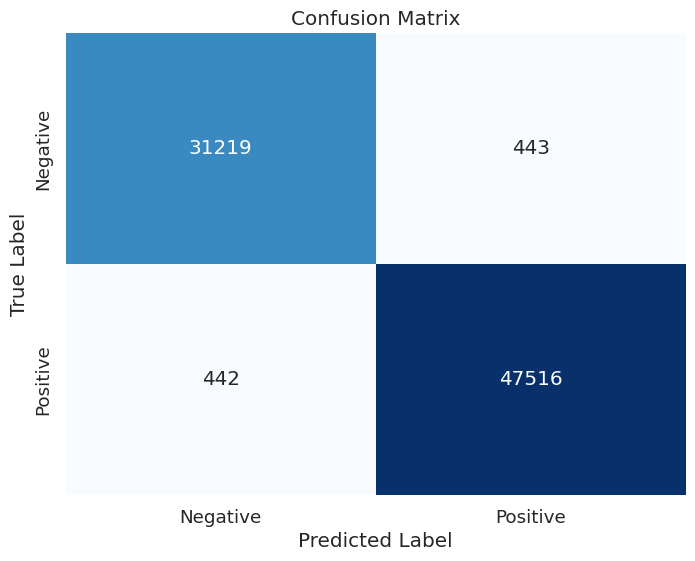

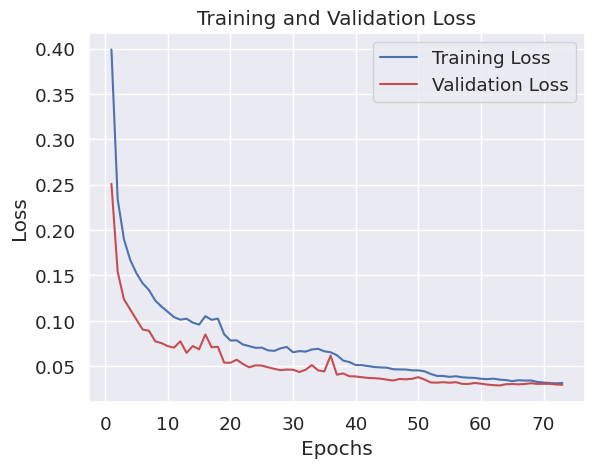

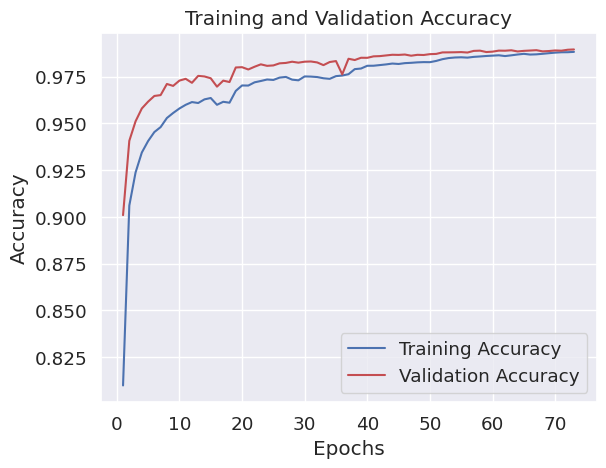

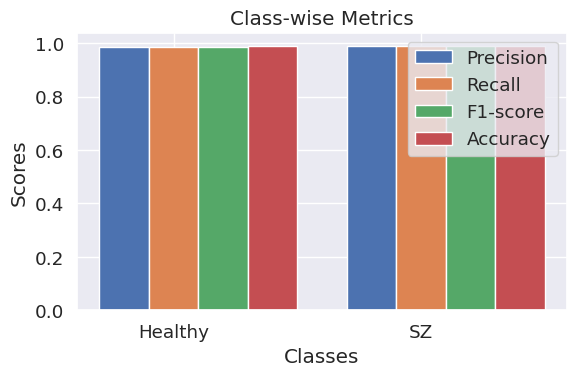

Training Accuracy: 98.83%
Validation Accuracy: 98.96%
2489/2489 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9886 - loss: 0.0303
Testing Accuracy: 98.89%
Precision: 99.08%
Recall: 99.08%
F1-Score: 99.08%


In [14]:
def plot_class_wise_metric(classes, y_test, y_pred_classes):
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None)
    accuracy = accuracy_score(y_test, y_pred_classes)
    class_labels = ['Healthy', 'SZ']

    # Define metrics to plot
    metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    classwise_metrics = [precision, recall, f1_score, [accuracy] * len(precision)]

    # Plot bar graph
    fig, ax = plt.subplots(figsize=(6, 4))

    index = np.arange(len(class_labels))
    bar_width = 0.2
    opacity = 0.8

    for i, metric in enumerate(metrics):
        ax.bar(index + i * bar_width, classwise_metrics[i], bar_width, label=metric)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Class-wise Metrics')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(class_labels)
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'{classes}_rimli_bar_graph.png')
    plt.show()

def plot_loss_curve(history, classes):
    # Access loss and accuracy from training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot loss vs epoch
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'{classes}_rimli_loss_curve.png')
    plt.show()

    # Plot accuracy vs epoch
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'{classes}_rimli_accuracy.png')
    plt.show()

def plot_confusion_matrix(y_test, y_pred_classes):
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set_theme(font_scale=1.2)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'], cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def metric_values(model, y_pred_classes, X_test, y_test):
    accuracy = model.evaluate(X_test, y_test)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
    print("Accuracy:", accuracy*100, "%")
    print("Precision:", precision*100, "%")
    print("Recall:", recall*100, "%")
    print("F1-score:", f1_score*100, "%")

# Model evaluation 
def evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs=100, batch_size=64):
    # Normalize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

    # Create and train the model
    model = ProposedModelFramework(2, input_shape)
    history = model.train(X_train, y_train, epochs, batch_size, validation_split=0.2)

    # Evaluate on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int).flatten()

    # Metrics and plots
    plot_confusion_matrix(y_test, y_pred_classes)
    plot_loss_curve(history, "Healthy vs Schizophrenic")
    plot_class_wise_metric("Healthy vs Schizophrenic", y_test, y_pred_classes)

    # Training and validation accuracy from history
    train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy
    val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy

    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

    # Evaluate model on test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='binary')
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1_score * 100:.2f}%")

# Perform model evaluation once
input_shape = (X_train.shape[1], X_train.shape[2])
epochs = 100
batch_size = 64
evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs, batch_size)


**SPATIAL ATTENTION**

In [16]:
# Import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Layer, GlobalAveragePooling2D, GlobalMaxPooling2D, Multiply, Add, Reshape, Activation, Bidirectional, GRU, PReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import seaborn as sns
from keras.regularizers import l2

# Define Spatial Attention Layer
class SpatialAttention(Layer):
    def __init__(self, filters, **kwargs):
        super(SpatialAttention, self).__init__(**kwargs)
        self.filters = filters
        self.conv = Conv2D(filters, kernel_size=(1, 1), activation='sigmoid')  

    def call(self, inputs):
        attention = self.conv(inputs)
        return Multiply()([inputs, attention])

    def get_config(self):
        config = super(SpatialAttention, self).get_config()
        config.update({
            "filters": self.filters
        })
        return config
        
# Define Model Framework
class ProposedModelFramework:
    def __init__(self, classes, input_shape):
        self.classes = classes
        self.input_shape = (input_shape[0], input_shape[1], 1)  # Add channel dimension
        self.model = Sequential()

        # CNN layers with PReLU activation
        self.model.add(Conv2D(32, (3, 1), input_shape=self.input_shape))
        self.model.add(PReLU())
        self.model.add(Conv2D(32, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))
        
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))

        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))

        # Flatten layer to prepare for BiGRU
        self.model.add(Flatten())
        # Reshape to fit Bigru input shape
        self.model.add(Reshape((-1, 128)))

        # Apply BiGRU layer before Spatial Attention
        self.model.add(Bidirectional(GRU(128, return_sequences=True)))

        # Reshape before Spatial Attention to add a channel dimension
        self.model.add(Reshape((-1, 1, 128)))
        # Apply Spatial Attention
        self.model.add(SpatialAttention(filters=128))

        # Reshape after Spatial Attention back to 3D
        self.model.add(Reshape((-1, 128)))

        # Flatten before Dense layers
        self.model.add(Flatten())

        # Dense layers with PReLU activation
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(256))
        self.model.add(PReLU())
        self.model.add(Dropout(0.5))

        # Final Classification Layer
        self.model.add(Dense(1, activation='sigmoid'))

    def train(self, X_train, y_train, epochs, batch_size, validation_split):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                 validation_split=validation_split, callbacks=[early_stopping, lr_scheduler])
        return history

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def display_summary(self):
        print("\nModel Summary:")
        self.model.summary()

# Example Usage 
input_shape = (X_train.shape[1], X_train.shape[2])  # Define shape
model = ProposedModelFramework(classes=1, input_shape=input_shape)
model.display_summary()



Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 146, 1, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_36 (PReLU)                   │ (None, 146, 1, 32)          │           4,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 144, 1, 32)          │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_37 (PReLU)                   │ (None, 144, 1, 32)          │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 72, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 72, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 70, 1, 64)           │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_38 (PReLU)                   │ (None, 70, 1, 64)           │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 68, 1, 64)           │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_39 (PReLU)                   │ (None, 68, 1, 64)           │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 34, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 34, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 32, 1, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_40 (PReLU)                   │ (None, 32, 1, 128)          │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 30, 1, 128)          │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_41 (PReLU)                   │ (None, 30, 1, 128)          │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 15, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_5 (Reshape)                  │ (None, 15, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 15, 256)             │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_6 (Reshape)                  │ (None, 30, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 895,073 (3.41 MB)

 Trainable params: 895,073 (3.41 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 67s 16ms/step - accuracy: 0.7536 - loss: 0.4769 - val_accuracy: 0.9285 - val_loss: 0.1805 - learning_rate: 0.0010
Epoch 2/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 61s 15ms/step - accuracy: 0.9129 - loss: 0.2151 - val_accuracy: 0.9550 - val_loss: 0.1156 - learning_rate: 0.0010
Epoch 3/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 61s 15ms/step - accuracy: 0.9406 - loss: 0.1501 - val_accuracy: 0.9682 - val_loss: 0.0812 - learning_rate: 0.0010
Epoch 4/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 61s 15ms/step - accuracy: 0.9562 - loss: 0.1139 - val_accuracy: 0.9751 - val_loss: 0.0670 - learning_rate: 0.0010
Epoch 5/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 61s 15ms/step - accuracy: 0.9652 - loss: 0.0914 - val_accuracy: 0.9769 - val_loss: 0.0605 - learning_rate: 0.0010
Epoch 6/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 62s 16ms/step - accuracy: 0.9709 - loss: 0.0760 - val_accuracy: 0.9812 - val_loss: 0.0493 - learning_rate: 0.0010
Epoch 7/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 64s 16ms/step -

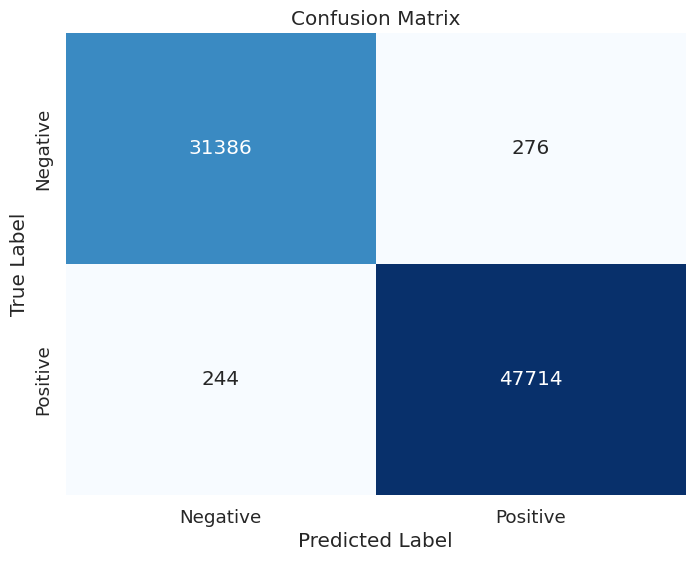

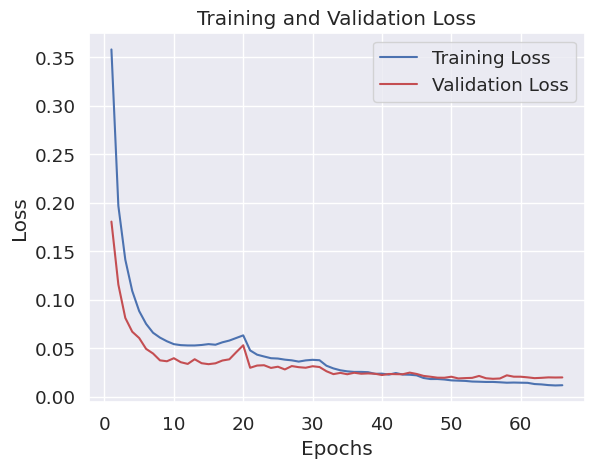

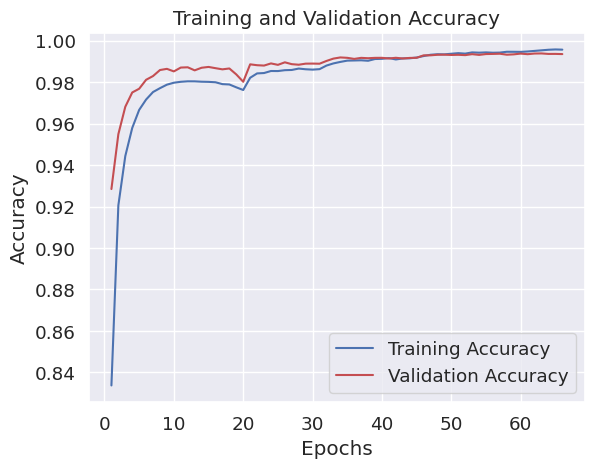

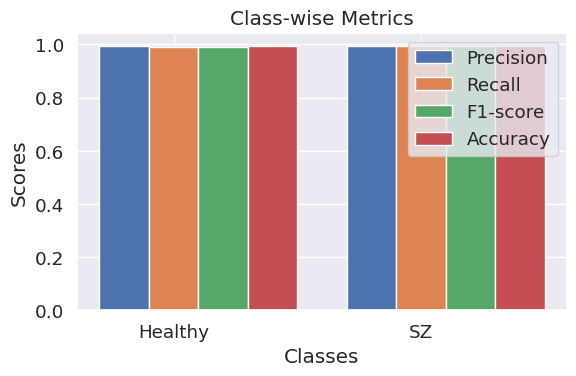

Training Accuracy: 99.57%
Validation Accuracy: 99.36%
2489/2489 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9934 - loss: 0.0176
Testing Accuracy: 99.35%
Precision: 99.42%
Recall: 99.49%
F1-Score: 99.46%


In [18]:
def plot_class_wise_metric(classes, y_test, y_pred_classes):
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None)
    accuracy = accuracy_score(y_test, y_pred_classes)
    class_labels = ['Healthy', 'SZ']

    # Define metrics to plot
    metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    classwise_metrics = [precision, recall, f1_score, [accuracy] * len(precision)]

    # Plot bar graph
    fig, ax = plt.subplots(figsize=(6, 4))

    index = np.arange(len(class_labels))
    bar_width = 0.2
    opacity = 0.8

    for i, metric in enumerate(metrics):
        ax.bar(index + i * bar_width, classwise_metrics[i], bar_width, label=metric)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Class-wise Metrics')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(class_labels)
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'{classes}_rimli_bar_graph.png')
    plt.show()

def plot_loss_curve(history, classes):
    # Access loss and accuracy from training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot loss vs epoch
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'{classes}_rimli_loss_curve.png')
    plt.show()

    # Plot accuracy vs epoch
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'{classes}_rimli_accuracy.png')
    plt.show()

def plot_confusion_matrix(y_test, y_pred_classes):
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set_theme(font_scale=1.2)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'], cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def metric_values(model, y_pred_classes, X_test, y_test):
    accuracy = model.evaluate(X_test, y_test)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
    print("Accuracy:", accuracy*100, "%")
    print("Precision:", precision*100, "%")
    print("Recall:", recall*100, "%")
    print("F1-score:", f1_score*100, "%")

# Model evaluation 
def evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs=100, batch_size=64):
    # Normalize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

    # Create and train the model
    model = ProposedModelFramework(2, input_shape)
    history = model.train(X_train, y_train, epochs, batch_size, validation_split=0.2)

    # Evaluate on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int).flatten()

    # Metrics and plots
    plot_confusion_matrix(y_test, y_pred_classes)
    plot_loss_curve(history, "Healthy vs Schizophrenic")
    plot_class_wise_metric("Healthy vs Schizophrenic", y_test, y_pred_classes)

    # Training and validation accuracy from history
    train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy
    val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy

    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

    # Evaluate model on test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='binary')
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1_score * 100:.2f}%")

# Perform model evaluation once
input_shape = (X_train.shape[1], X_train.shape[2])
epochs = 100
batch_size = 64
evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs, batch_size)


**TEMPORAL ATTENTION**

In [20]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Layer, Reshape, Activation, Bidirectional, GRU, PReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2

class TemporalAttention(tf.keras.layers.Layer):
    def __init__(self, filters, **kwargs):
        super(TemporalAttention, self).__init__(**kwargs)
        self.filters = filters

    def build(self, input_shape):
        feature_dim = input_shape[-1]  # Get the feature dimension dynamically
        self.dense1 = tf.keras.layers.Dense(feature_dim, activation='tanh')
        self.dense2 = tf.keras.layers.Dense(feature_dim, activation='sigmoid')

    def call(self, inputs):
        tanh_out = self.dense1(inputs)  # (None, time_steps, feature_dim)
        sigmoid_out = self.dense2(inputs)  # (None, time_steps, feature_dim)
        attention_weights = tanh_out * sigmoid_out  # Ensure same shape as inputs
        return inputs * attention_weights  # Element-wise multiplication

    def compute_output_shape(self, input_shape):
        return input_shape  # The output shape is the same as the input shape

# Define Model Framework
class ProposedModelFramework:
    def __init__(self, classes, input_shape):
        self.classes = classes
        self.input_shape = (input_shape[0], input_shape[1], 1)  # Add channel dimension
        self.model = Sequential()

        # CNN layers with PReLU activation
        self.model.add(Conv2D(32, (3, 1), input_shape=self.input_shape))
        self.model.add(PReLU())
        self.model.add(Conv2D(32, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))
        
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))

        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))

        # Flatten layer to prepare for BiGRU
        self.model.add(Flatten())
        # Reshape to fit BiGRU input shape
        self.model.add(Reshape((-1, 128)))

        # Apply BiGRU layer before Temporal Attention
        self.model.add(Bidirectional(GRU(128, return_sequences=True)))
        
        # Apply Temporal Attention
        self.model.add(TemporalAttention(filters=128))
        
        # Flatten before Dense layers
        self.model.add(Flatten())

        # Dense layers with PReLU activation
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(256))
        self.model.add(PReLU())
        self.model.add(Dropout(0.5))

        # Final Classification Layer
        self.model.add(Dense(1, activation='sigmoid'))

    def train(self, X_train, y_train, epochs, batch_size, validation_split):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                 validation_split=validation_split, callbacks=[early_stopping, lr_scheduler])
        return history

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def display_summary(self):
        print("\nModel Summary:")
        self.model.summary()

# Example Usage 
input_shape = (X_train.shape[1], X_train.shape[2])  # Define shape
model = ProposedModelFramework(classes=1, input_shape=input_shape)
model.display_summary()



Model Summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)                   │ (None, 146, 1, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_72 (PReLU)                   │ (None, 146, 1, 32)          │           4,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 144, 1, 32)          │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_73 (PReLU)                   │ (None, 144, 1, 32)          │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 72, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 72, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 70, 1, 64)           │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_74 (PReLU)                   │ (None, 70, 1, 64)           │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 68, 1, 64)           │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_75 (PReLU)                   │ (None, 68, 1, 64)           │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 34, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 34, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 32, 1, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_76 (PReLU)                   │ (None, 32, 1, 128)          │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 30, 1, 128)          │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_77 (PReLU)                   │ (None, 30, 1, 128)          │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 15, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_15 (Reshape)                 │ (None, 15, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 15, 256)             │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ temporal_attention_1                 │ (None, 15, 256)             │               0 │
│ (TemporalAttention)                  │                             │              

 Total params: 878,561 (3.35 MB)

 Trainable params: 878,561 (3.35 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 70s 16ms/step - accuracy: 0.6001 - loss: 0.6738 - val_accuracy: 0.6032 - val_loss: 0.6717 - learning_rate: 0.0010
Epoch 2/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 64s 16ms/step - accuracy: 0.6015 - loss: 0.6728 - val_accuracy: 0.6032 - val_loss: 0.6718 - learning_rate: 0.0010
Epoch 3/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 64s 16ms/step - accuracy: 0.6015 - loss: 0.6727 - val_accuracy: 0.6032 - val_loss: 0.6717 - learning_rate: 0.0010
Epoch 4/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 64s 16ms/step - accuracy: 0.6014 - loss: 0.6727 - val_accuracy: 0.6032 - val_loss: 0.6717 - learning_rate: 0.0010
Epoch 5/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 64s 16ms/step - accuracy: 0.6033 - loss: 0.6718 - val_accuracy: 0.6032 - val_loss: 0.6717 - learning_rate: 0.0010
Epoch 6/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 64s 16ms/step - accuracy: 0.6019 - loss: 0.6724 - val_accuracy: 0.6032 - val_loss: 0.6717 - learning_rate: 0.0010
Epoch 7/100
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 63s 16ms/step -

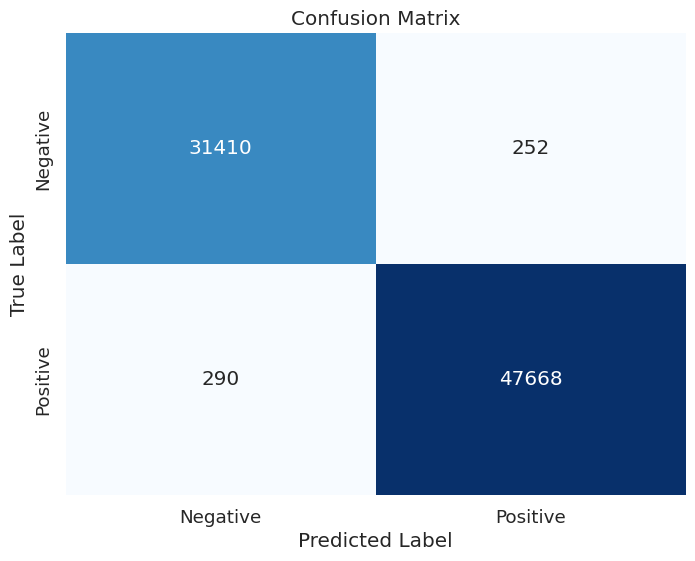

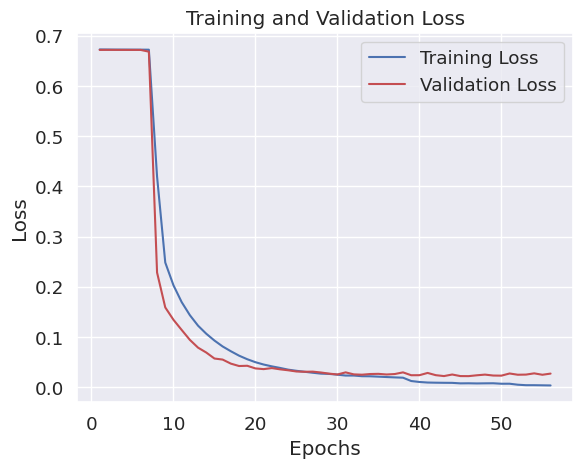

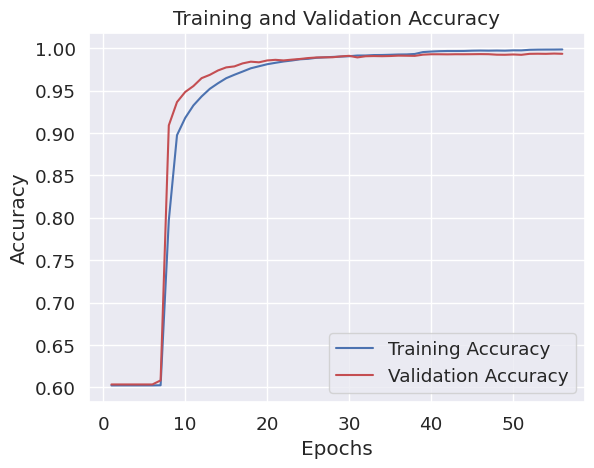

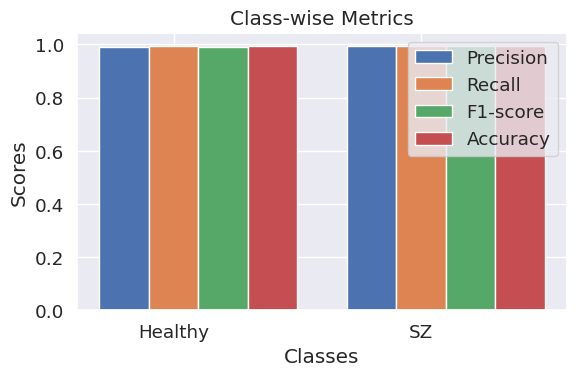

Training Accuracy: 99.88%
Validation Accuracy: 99.36%
2489/2489 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9934 - loss: 0.0220
Testing Accuracy: 99.32%
Precision: 99.47%
Recall: 99.40%
F1-Score: 99.43%


In [21]:
def plot_class_wise_metric(classes, y_test, y_pred_classes):
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None)
    accuracy = accuracy_score(y_test, y_pred_classes)
    class_labels = ['Healthy', 'SZ']

    # Define metrics to plot
    metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    classwise_metrics = [precision, recall, f1_score, [accuracy] * len(precision)]

    # Plot bar graph
    fig, ax = plt.subplots(figsize=(6, 4))

    index = np.arange(len(class_labels))
    bar_width = 0.2
    opacity = 0.8

    for i, metric in enumerate(metrics):
        ax.bar(index + i * bar_width, classwise_metrics[i], bar_width, label=metric)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Class-wise Metrics')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(class_labels)
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'{classes}_rimli_bar_graph.png')
    plt.show()

def plot_loss_curve(history, classes):
    # Access loss and accuracy from training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot loss vs epoch
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'{classes}_rimli_loss_curve.png')
    plt.show()

    # Plot accuracy vs epoch
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'{classes}_rimli_accuracy.png')
    plt.show()

def plot_confusion_matrix(y_test, y_pred_classes):
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set_theme(font_scale=1.2)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'], cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def metric_values(model, y_pred_classes, X_test, y_test):
    accuracy = model.evaluate(X_test, y_test)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
    print("Accuracy:", accuracy*100, "%")
    print("Precision:", precision*100, "%")
    print("Recall:", recall*100, "%")
    print("F1-score:", f1_score*100, "%")

# Model evaluation 
def evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs=100, batch_size=64):
    # Normalize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

    # Create and train the model
    model = ProposedModelFramework(2, input_shape)
    history = model.train(X_train, y_train, epochs, batch_size, validation_split=0.2)

    # Evaluate on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int).flatten()

    # Metrics and plots
    plot_confusion_matrix(y_test, y_pred_classes)
    plot_loss_curve(history, "Healthy vs Schizophrenic")
    plot_class_wise_metric("Healthy vs Schizophrenic", y_test, y_pred_classes)

    # Training and validation accuracy from history
    train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy
    val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy

    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

    # Evaluate model on test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='binary')
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1_score * 100:.2f}%")

# Perform model evaluation once
input_shape = (X_train.shape[1], X_train.shape[2])
epochs = 100
batch_size = 64
evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs, batch_size)
